In [1]:
#find web page with episode descriptions of Ted Lasso
#scrape the page to pull out individual descriptions
#compute polarity score (textblob) of each episode, see how it changed over time

In [2]:
#start with some web scraping practice, before we get to real one
from urllib.request import urlopen
from bs4 import BeautifulSoup
from textblob import TextBlob

In [3]:
#scrape the tiny fake webpage
html = urlopen("https://www.khoury.northeastern.edu/home/laney/simple.html")
bs = BeautifulSoup(html.read(), 'html.parser')

In [4]:
#whats the h1
print(bs.h1)

<h1>Header!</h1>


In [5]:
#webpage title
bs.title

<title>Laney's Fake Web page</title>

In [7]:
#get a list of all the images
imgs = bs.findAll("img")
imgs

[<img src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2022/07/072822_AS_Sarge_001.jpg?w=1400&amp;ssl=1" width="100"/>,
 <img alt="Cooper, Northeastern's community dog" height="100" src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2021/06/062421_MM_cooper_039.jpg?w=1400&amp;ssl=1" width="100"/>,
 <img alt="Paws, of the Howlin Huskies" src="https://huntnewsnu.com/wp-content/uploads/2014/05/1565016743_c8982ca545_z.jpg" width="100"/>]

In [8]:
#get the conten between <p></p>
paragraphs = bs.findAll("p")
for p in paragraphs:
    print(p.get_text())

Hello I am a paragraph of some content. Content content content.
I am the second paragraph, with more information. click here.
More content. click here also.
	


In [11]:
#get some practice with sentiment score (wording changes the score)
tb = TextBlob("nice weather today!")
tb.sentiment.polarity

0.75

In [13]:
#does it pay attention to phrase not just words
tb = TextBlob("it could have been worse")
tb.sentiment.polarity

-0.4

In [17]:
#keep up with slang
tb = TextBlob("that person has rizz")
tb.sentiment.polarity

0.0

In [18]:
#lets find out if we should watch Ted lasso over break
html = urlopen("https://en.wikipedia.org/wiki/Ted_Lasso")
bs = BeautifulSoup(html.read(), "html.parser")

In [19]:
descriptions = bs.findAll("td", {"class" : "description"})
for d in descriptions:
    print(d.get_text(), "\n")


Recently divorced Rebecca Welton becomes the new owner of the fictional AFC Richmond, a struggling club in the Premier League. To seek revenge on her ex-husband who cheated on her multiple times and was never blamed for it, Rebecca resolves to hire the most incompetent coach she can find to ruin the club, as it was the only thing her ex ever loved. To this end she hires Ted Lasso, a college football coach from Wichita, Kansas. Ted has recently coached an NCAA Division II football team to a title, but knows nothing about soccer. Arriving in Richmond with his assistant, Coach Beard, he tries to connect with his new teammates with his positive, folksy charm, but the club hates him anyway. He is thought of as a rube, but it soon becomes clear he is smarter than he looks. In his apartment at night, he speaks to his son and wife on the phone and hints that he took the job because his wife had wanted "space". 


On his first day at AFC Richmond, Ted attempts to win over the players and manag

In [20]:
len(descriptions)

34

In [27]:
pols = []
for d in descriptions:
    tb = TextBlob(d.get_text())
    pols.append(tb.sentiment.polarity)
pols

[0.10384615384615385,
 0.11217948717948717,
 -0.044065656565656565,
 0.052777777777777785,
 0.021071428571428585,
 0.21382189239332097,
 -0.08593750000000001,
 0.06458333333333334,
 0.08672438672438673,
 0.1138888888888889,
 0.20606060606060606,
 -0.08863636363636362,
 -0.04166666666666668,
 -0.16785714285714284,
 0.17045454545454544,
 0.022222222222222216,
 0.09289772727272727,
 -0.12542735042735043,
 -0.11538461538461539,
 -0.020833333333333332,
 0.1459505772005772,
 0.19642857142857142,
 0.04852272727272726,
 -0.10400000000000001,
 0.14545454545454548,
 -0.05277777777777778,
 -0.11153846153846152,
 0.15233585858585857,
 0.10111111111111111,
 0.30238095238095236,
 0.00468749999999999,
 -0.10833333333333334,
 -0.17055555555555557,
 0.08080808080808081]

(-0.4, 0.4)

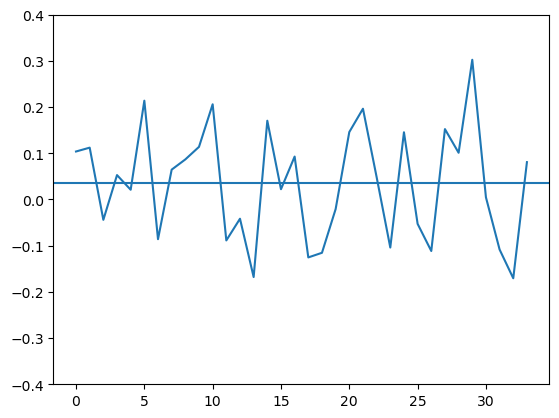

In [28]:
import matplotlib.pyplot as plt
plt.plot(pols)
plt.axhline(sum(pols) / len(pols))
plt.ylim(-.4,.4)